In [2]:
import sys
sys.path.insert(0, '../casadi_f16')
import f16
import numpy as np

1. Set trimming Conditions: $VT=550 ft/s, R = 20 deg/s = \frac{\pi}{9}$ rad/s

In [3]:
p = f16.Parameters()

x0, u0 = f16.trim(s0 = [0,0,0,0,0,0], x=f16.State(VT=550, R=np.pi/9), p = p,
        phi_dot=0, theta_dot=0, psi_dot=0.3, gam=0)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

               t_proc [s]   t_wall [s]    n_eval
           S       0.0288       0.0287         1
       nlp_f      0.00337      0.00337        57
  nlp_grad_f      0.00301        0.003        19
  nlp_hess_l      0.00956      0.00965        17


2. Get state space of the system

In [8]:
ss = f16.linearize(x0=x0, u0=u0, p0=p)
import control
sub_ss = ss.sub_system(x=['VT','R'], u=['ail_deg'], y=['R']).to_control()

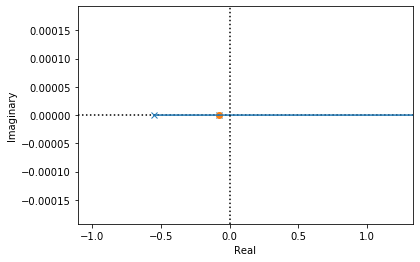

In [13]:
G = control.ss2tf(sub_ss)
poles = control.pole(G)
zeros = control.zero(G)